# Lead Scoring Assignment

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Importing the library

In [848]:
#importing the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

%matplotlib inline

In [849]:
pd.set_option("display.max_columns" ,None)  # displaying the no of the column in the notebook
pd.set_option('display.max_rows',None)   # displaying all the records in the notebook for anaylsis

In [850]:
import warnings     # for ignoring the warnings
warnings.filterwarnings('ignore')

# 1. Important the Data And Analyzing it

In [851]:
# importing the database
data = pd.read_csv('Leads.csv')

In [852]:
#checking the head of the database
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [853]:
#shape of the data
data.shape

(9240, 37)

In [854]:
# checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [855]:
category = []
for i in data.columns:
    if data[i].dtype == 'object':
        category.append(i)
        
print(len(category))

30


- We have total 30 columns as categorical column

In [856]:
# let's check the statistical values of contineous variable
data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Checking the null values in the dataset

In [857]:
# checking the null values
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [858]:
# NUll values in percentages
percentage_data =  data.isnull().sum()/ len(data)* 100
percentage_data.sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

- There are lots of category column in which <B>'Select'</B> is there which means user is not provided any values so it is considered to be a null values

In [859]:
# Converting all the values to lower case
data = data.applymap(lambda s:s.lower() if type(s) == str else s)

In [860]:
# Replacing 'Select' with NaN (Since it means no option is selected which ie equivalent to null values)
data = data.replace('select',np.nan)

In [861]:
# NUll values in percentages
percentage_data =  data.isnull().sum()/ len(data)* 100
percentage_data.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### Removing all the column having null values greater than 35%

In [862]:
data = data.drop(['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'City', 'Tags'], axis = 1)

In [863]:
# checking the no of unique values in individual column
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

#### Dropping the column which has 1 unique values as it won't gives us any information

In [864]:
# dropping the columns
data = data.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content',
                 'Receive More Updates About Our Courses','Magazine' ] , axis = 1)

In [865]:
data.shape

(9240, 23)

In [866]:
percentage_data =  data.isnull().sum()/ len(data)* 100
percentage_data.sort_values(ascending=False)

Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Prospect ID                                       0.000000
Lead Number                                       0.0000

<font color= brown> There is a 4 columns in which null values are high as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'Not Provided'. This way we have all the data and almost no null values.</font>

In [867]:
data['Specialization'] = data['Specialization'].fillna('not provided') 
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].fillna('not provided')
data['Country'] = data['Country'].fillna('not provided')
data['What is your current occupation'] = data['What is your current occupation'].fillna('not provided')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Unique values of Categorical column

In [868]:
data['Country'].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [869]:
def categorize(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

data['Country'] = data.apply(lambda x:categorize(x['Country']), axis = 1)
data['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [870]:
# Rechecking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [871]:
# checking the null remaining values is present in the same rows of the data

data[(data['TotalVisits'].isnull()) & (data['Page Views Per Visit'].isnull()) & (data['Last Activity'].isnull())]

Prospect ID  Lead Number    Lead Origin  \
77    895d4905-f534-4f18-915b-8d239a72b5dc       659722  lead add form   
79    3a0ce10f-d2c1-4213-a2bc-4f97bcd29699       659710  lead add form   
81    277ad6a6-4565-4a18-a1ff-e46e03f22663       659705  lead add form   
88    68f496c2-0073-470f-9c3c-7fb48f060ce5       659631  lead add form   
120   144807db-2895-4002-b52e-3eda79c22395       659283  lead add form   
133   63ebde80-a465-4cdc-ab5a-5e880a7138b0       659158  lead add form   
134   0298b9a5-fedb-408b-a284-2d357583600f       659153  lead add form   
177   3b74e995-4407-44de-9e59-622afb514261       658648  lead add form   
179   1730b5e8-e435-41c6-9082-b9c98976bd16       658627  lead add form   
180   db2dc4b5-f603-4818-9b0c-0435923a4cd8       658623  lead add form   
212   b6a07644-72d3-40b7-9c75-f996c6ee96a0       658258  lead add form   
267   b188ce42-4d14-4a53-80fb-e554ce3959ca       657611  lead add form   
269   35c83b23-921f-47da-8a95-5ebab14962ad       657590  lead add form   
299   149ea70e-6f74-4c23-8102-ff16b27d6b13       657247  lead add form   
348   aab15462-f9bd-4c1a-99f8-f1086cbbc9e0       656715  lead add form   
364   5befbbb7-2cf3-4a47-bb6f-086652eb131d       656563  lead add form   
369   5da64b7b-6302-45da-8462-872cc3cadd6a       656516  lead add form   
470   99bc24d5-cd9c-4f70-a4b7-b2c5d3da56d7       655352  lead add form   
585   6be73ad7-525d-11e6-96be-22000aa8e760       654173    lead import   
587   6be73d7d-525d-11e6-96be-22000aa8e760       654175    lead import   
589   6be73e31-525d-11e6-96be-22000aa8e760       654177    lead import   
590   6be73e7b-525d-11e6-96be-22000aa8e760       654178    lead import   
591   6be73ed9-525d-11e6-96be-22000aa8e760       654179    lead import   
592   6be73f79-525d-11e6-96be-22000aa8e760       654181    lead import   
593   6be73fc3-525d-11e6-96be-22000aa8e760       654182    lead import   
596   6be740b1-525d-11e6-96be-22000aa8e760       654185    lead import   
597   6be740fd-525d-11e6-96be-22000aa8e760       654186    lead import   
598   6be74143-525d-11e6-96be-22000aa8e760       654187    lead import   
601   6be74234-525d-11e6-96be-22000aa8e760       654190    lead import   
603   6be74452-525d-11e6-96be-22000aa8e760       654192    lead import   
631   2c95ac86-9b80-4326-944c-9b69278e6745       653943  lead add form   
949   963516d0-1d43-4952-82a5-67de560c4ef0       650234  lead add form   
994   1627d1fe-f39b-4a29-ba9e-ab40ab643d05       649493  lead add form   
1099  dc60bd9e-70a2-4dae-b764-3602bae89a7b       648284  lead add form   
1136  498bb1e1-4e52-11e6-96be-22000aa8e760       647987    lead import   
1137  498bb28a-4e52-11e6-96be-22000aa8e760       647988    lead import   
1145  498bc453-4e52-11e6-96be-22000aa8e760       647996    lead import   
1249  0fe1b997-2de1-4cfe-a9b3-5db15210e2b7       646662  lead add form   
1258  502e3dcc-b2eb-4891-90c3-7eeb2881816e       646552  lead add form   
1393  a8672970-1a5d-48c9-a376-821853b6d180       645377  lead add form   
1395  9cf1e54d-b0d1-4015-af39-add477d3aaf2       645370  lead add form   
1548  f3d5ea5f-2b94-41c8-9521-91a445380ce8       644000  lead add form   
1574  27bff521-8875-4558-9cbc-763cbecde2b9       643871  lead add form   
1634  d2086c68-4a7e-11e6-b61b-22000aa8e760       643273    lead import   
2001  c62f80aa-8277-4e71-931d-b0baa82bb307       640295  lead add form   
2070  6e161e2b-6cdf-43e5-ba7f-c2ad4fef9366       639602  lead add form   
2134  4d5d16b2-778c-432b-bfdd-50734c4f8ae1       639246  lead add form   
2656  59996c52-d485-48c6-9777-d8deaec1e4ab       634047  lead add form   
2786  77e26553-3741-4f64-afc2-662de8a7bf72       632926  lead add form   
2921  ab5331cb-e85f-4782-931f-fb587eb2d1fd       631658  lead add form   
2924  a3c1db24-eaad-4ed9-bc59-8e610f2c6c3a       631647  lead add form   
2925  c84f368b-4b13-4091-8ce5-98c219556e63       631642  lead add form   
2942  2d16315d-5afa-401e-b21a-66467bebaa70       631507  lead add form   
2976  2f108e18-ab4c-4658-b917-c2d47

In [872]:
print('Total Number of Rows having null values :',sum(data.isnull().sum(axis=1) >1))
print('Total number of Rqws in ENtire Data :' ,data.shape[0] )

Total Number of Rows having null values : 137
Total number of Rqws in ENtire Data : 9240


In [873]:
# Checking the percent of lose if the null values are removed
round(100*(sum(data.isnull().sum(axis=1) > 1)/data.shape[0]),2)

1.48

#### The amount of percentage of the total null values is very less so we can remove them..(out of 9240 rows only 137 rows have a null values which is very less)

In [874]:
# removing the null values
data = data[data.isnull().sum(axis=1) <1]

In [875]:
data.shape

(9074, 23)

In [876]:
# Rechecking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [877]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      api   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      api   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  landing page submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  landing page submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  landing page submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      olark chat           no          no          0          0.0   
1  organic search           no          no          0          5.0   
2  direct traffic           no          no          1          2.0   
3  direct traffic           no          no          0          1.0   
4          google           no          no          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  page visited on website   
1                          674                   2.5             email opened   
2                         1532                   2.0             email opened   
3                          305                   1.0              unreachable   
4                         1428                   1.0        converted to lead   

        Country           Specialization What is your current occupation  \
0  not provided             not provided                      unemployed   
1         india             not provided                      unemployed   
2         india  business administration                         student   
3         india    media and advertising                      unemployed   
4         india             not provided                      unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       better career prospects     no                no   
1                       better career prospects     no                no   
2                       better career prospects     no                no   
3                       better career prospects     no                no   
4                       better career prospects     no                no   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 no        no                    no                      no   
1                 no        no                    no                      no   
2                 no        no                    no                      no   
3                 no        no                    no                      no   
4                 no        no                    no                      no   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                                     no              modified  
4                                     no              modified

In [878]:
data.shape

(9074, 23)

In [879]:
data['Prospect ID'].nunique()

9074

In [880]:
data['Lead Number'].nunique()

9074

#### Prospect ID && Lead Number both are unique for each rows so we can drop them

In [881]:
data = data.drop(['Prospect ID' ,'Lead Number' ] ,axis = 1)

# 2. EDA Analysis

In [882]:
# checking the head of data
data.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      api      olark chat           no          no   
1                      api  organic search           no          no   
2  landing page submission  direct traffic           no          no   
3  landing page submission  direct traffic           no          no   
4  landing page submission          google           no          no   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity       Country           Specialization  \
0  page visited on website  not provided             not provided   
1             email opened         india             not provided   
2             email opened         india  business administration   
3              unreachable         india    media and advertising   
4        converted to lead         india             not provided   

  What is your current occupation  \
0                      unemployed   
1                      unemployed   
2                         student   
3                      unemployed   
4                      unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       better career prospects     no                no   
1                       better career prospects     no                no   
2                       better career prospects     no                no   
3                       better career prospects     no                no   
4                       better career prospects     no                no   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 no        no                    no                      no   
1                 no        no                    no                      no   
2                 no        no                    no                      no   
3                 no        no                    no                      no   
4                 no        no                    no                      no   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                                     no              modified  
4                                     no              modified

In [883]:
data.shape

(9074, 21)

In [884]:
# Anaysize the categorical column -- count plot
# analyze the numerical column -- histogram or box plot -- check outliners also
# analysze the categorical with target varaible
# analyze the numberical varable scatter plot



## Univariate Analysis - Categorical 

In [885]:
# creating the function so that we can call it
def univariate_categorical_countplot(columnname):
    plt.figure(figsize=(10,4))
    sns.set(style="darkgrid")
    sns.countplot(x = columnname , data = data)
    plt.title("Count Plot For '{}'".format(columnname) ,fontdict = {'fontsize':'15', 'fontweight':'5'})
    plt.xticks(rotation=90)
    
    plt.show()

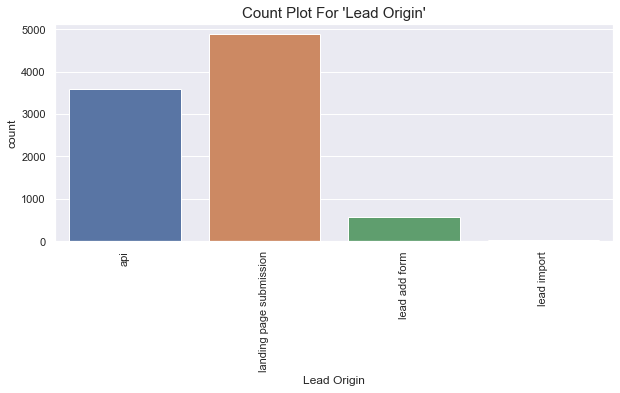

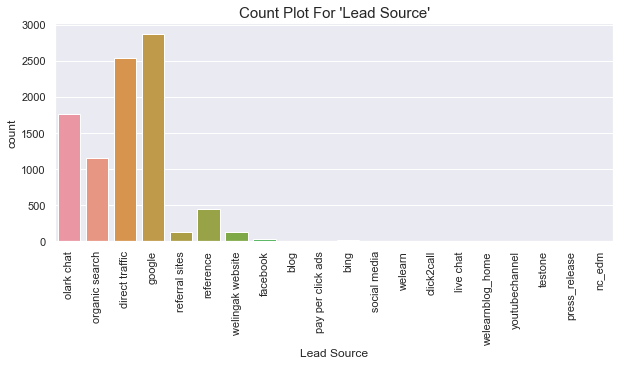

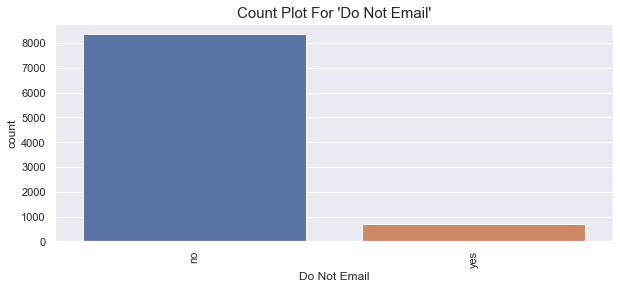

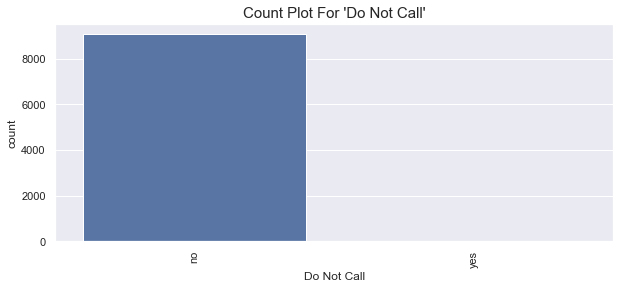

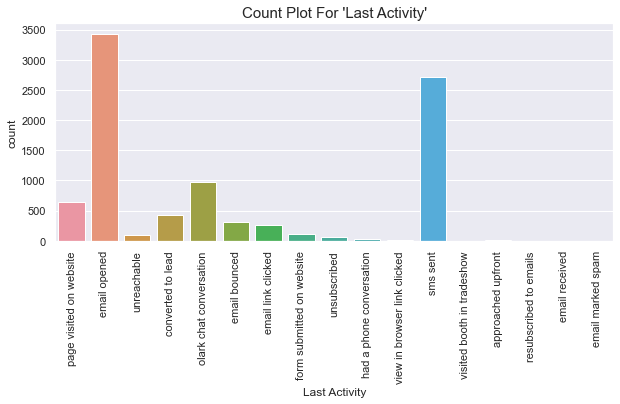

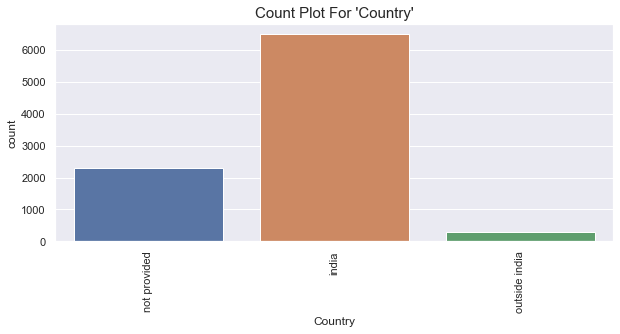

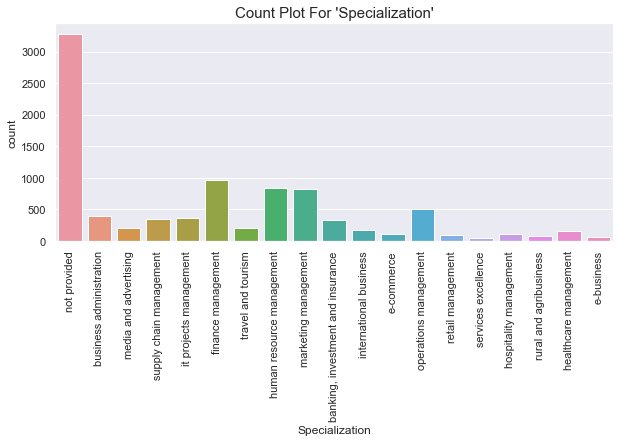

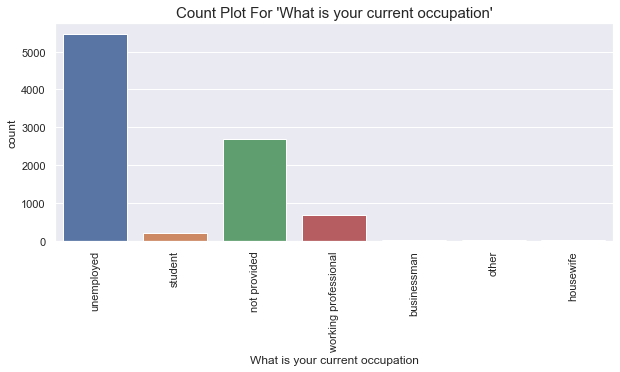

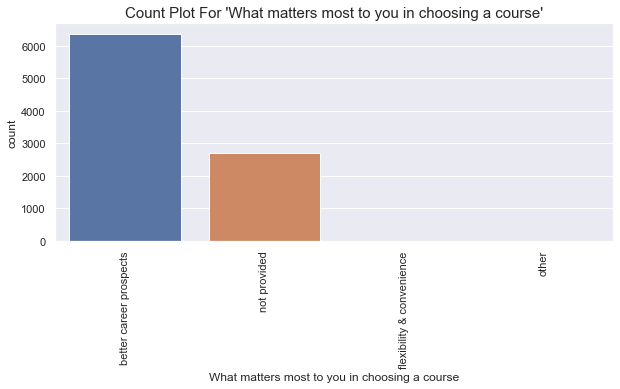

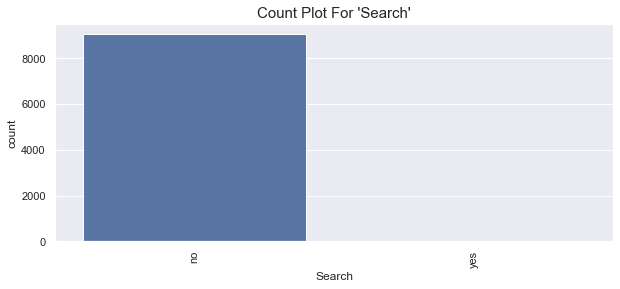

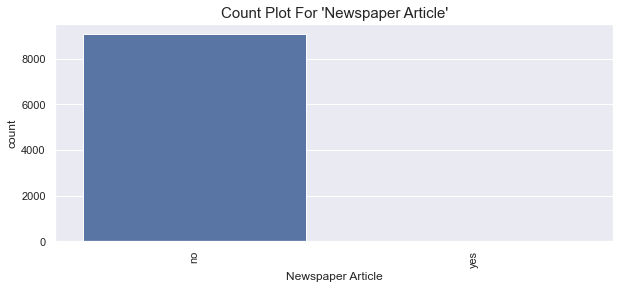

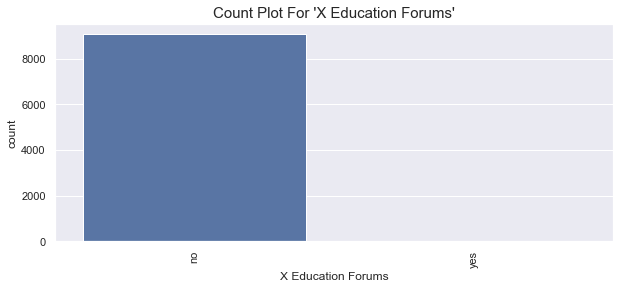

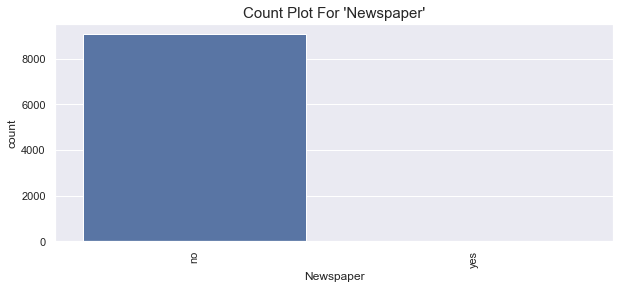

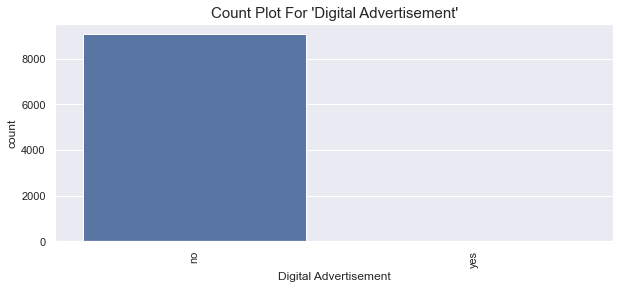

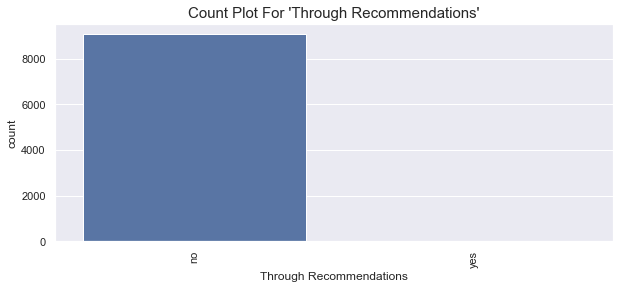

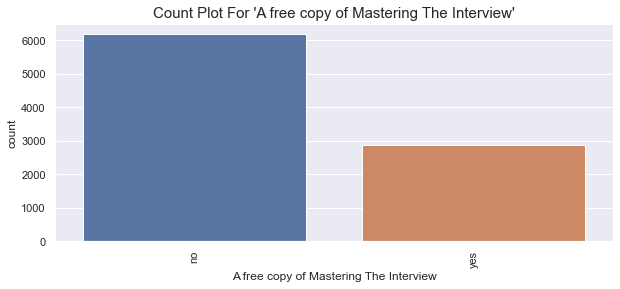

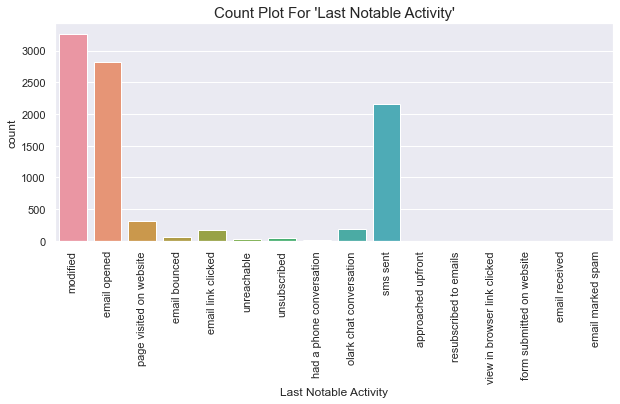

In [886]:
for i,name in enumerate(data.columns):
    if data[name].dtype == 'object':
        univariate_categorical_countplot(name)

## Univariate On Numerical Column

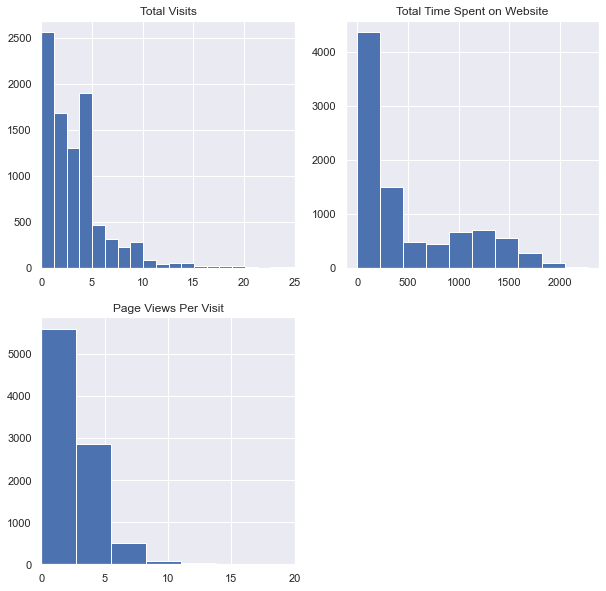

In [887]:
# we will use box plot for the numerical varaible
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

## checking Outliners on Numerical variable

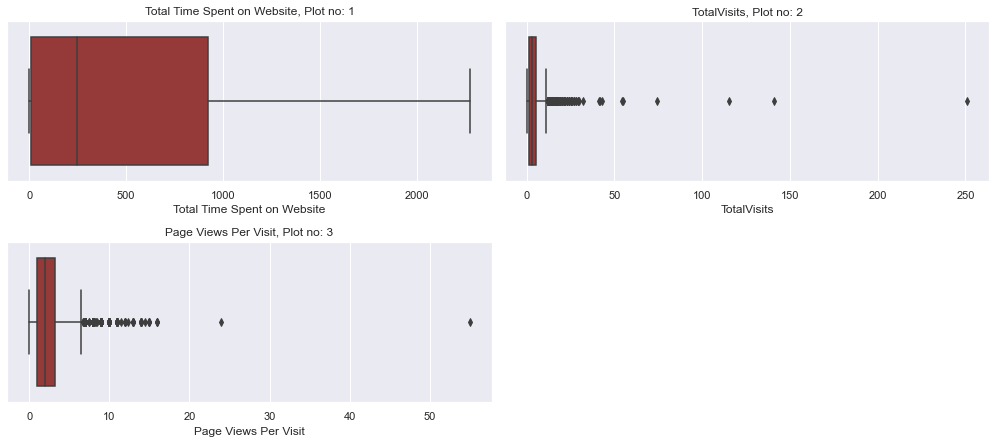

In [888]:
## For the outliners detection we can use BOX PLOT which is efficient to detecting outliners

## We are taking the contineous column for the outliners
checking_outliners = ['Total Time Spent on Website','TotalVisits', 'Page Views Per Visit']
c = 1
fig = plt.figure(figsize=(14,12))
for i in checking_outliners:
    plt.subplot(4,2,c)
    plt.title('{}, Plot no: {}'.format(i ,c))
    sns.boxplot(data[i] ,color = 'brown')
    c = c +1
    
plt.tight_layout()
    
plt.show()

In [889]:
print("For column Total Visits :" , len(data[data['TotalVisits'] > 40]))
print("For column Page Views Per Visit :" , len(data[data['Page Views Per Visit'] > 20]))

For column Total Visits : 9
For column Page Views Per Visit : 2


### From the above anaysis , there are outliners in 'Total Visits'  And 'Page Views Per Visit' columns
- For Total Visits columns, after the upper fence there are lots of data which is very nearly and closed packed with upper fence and as the no of data also high we can considered it as a usual normal scenerio but the data which is greater than 30 are very far from upper fence they are treated as outliners and as the no of data is very low i.e 9 we can easily remove them. 
- For 'Page Views Per Visit' columns, the data which is greater than 20 is treated as a outliners and the no of data is very low which is 2 , we can remove them without any risk

### Treating the Outliners

In [890]:
data = data[~(data['TotalVisits'] > 30)]

In [891]:
data = data[~(data['Page Views Per Visit'] > 20)]

In [892]:
data.shape

(9063, 21)

In [893]:
numeric = data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9063.000000                  9063.000000           9063.000000
mean      3.364008                   482.718195              2.359469
std       3.413595                   545.233371              2.073536
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   921.500000              3.000000
90%       7.000000                  1373.000000              5.000000
99%      16.000000                  1839.000000              9.000000
max      30.000000                  2272.000000             16.000000

<font color= green>___There aren't any major outliers, so moving on to analysis___</font>

## Bivariate Analysis On Categorical Column

In [894]:
# creating the function so that we can call it
def bivariate_categorical_countplot(columnname):
    plt.figure(figsize=(10,4))
    sns.set(style="darkgrid")
    sns.countplot(x = columnname , hue = data['Converted'] , data = data)
    plt.title("Count Plot For '{}'".format(columnname) ,fontdict = {'fontsize':'15', 'fontweight':'5'})
    plt.xticks(rotation=90)
    
    plt.show()

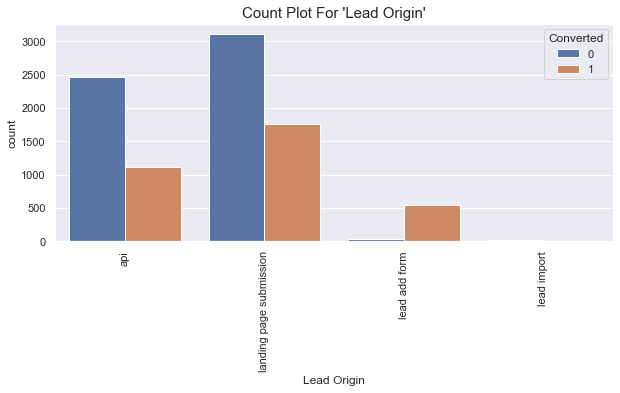

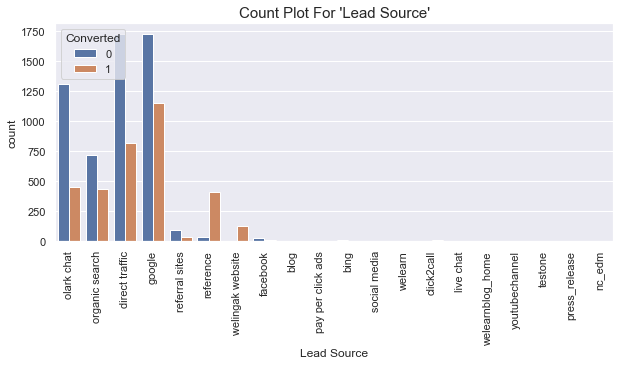

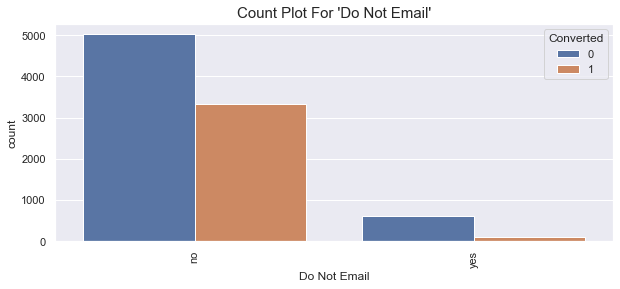

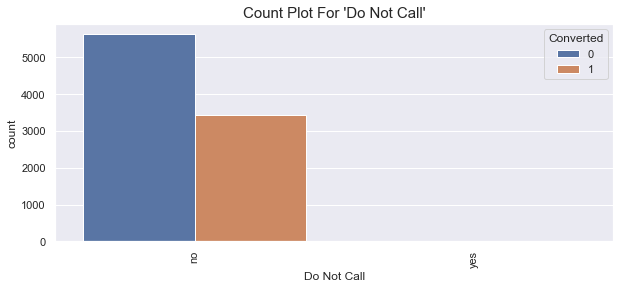

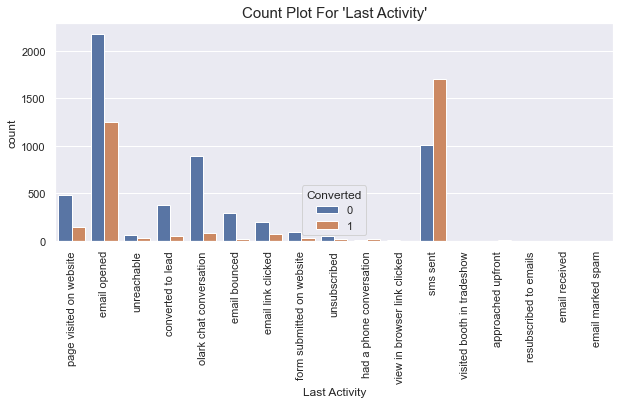

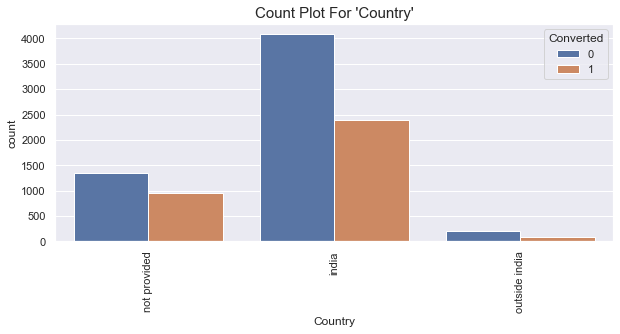

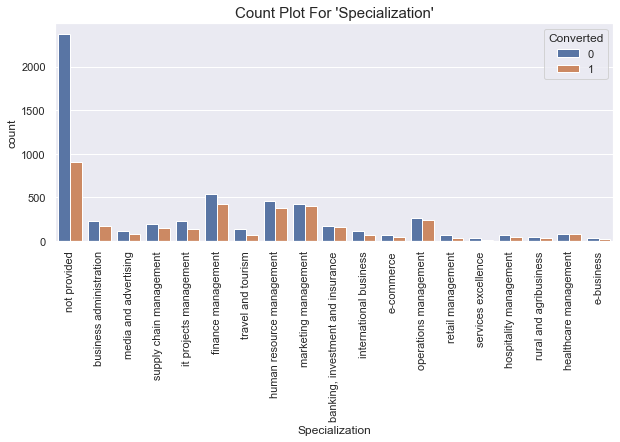

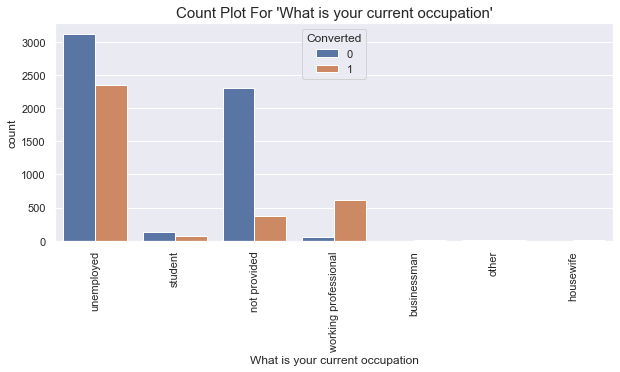

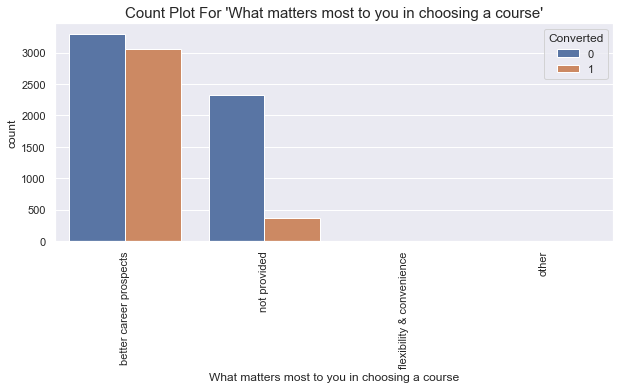

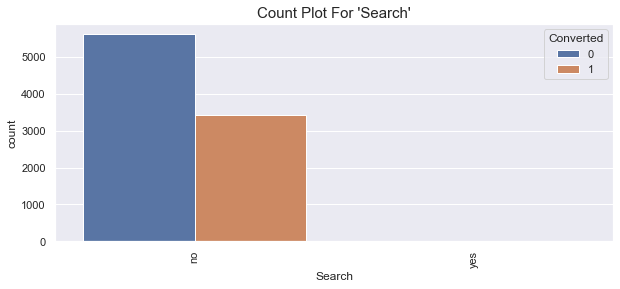

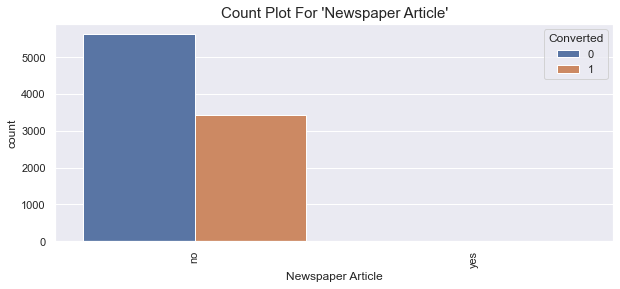

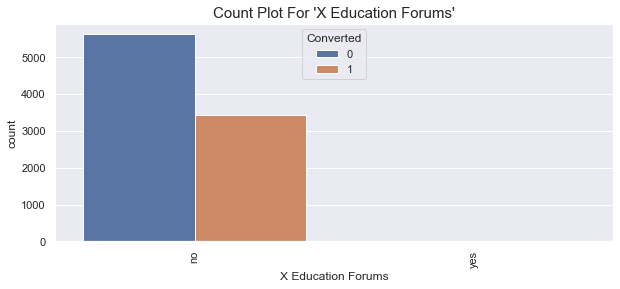

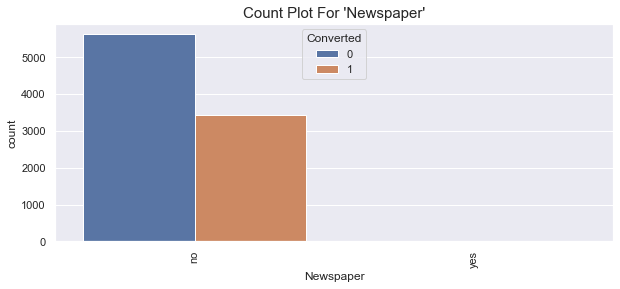

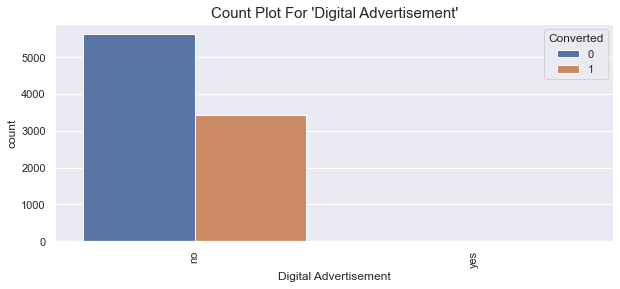

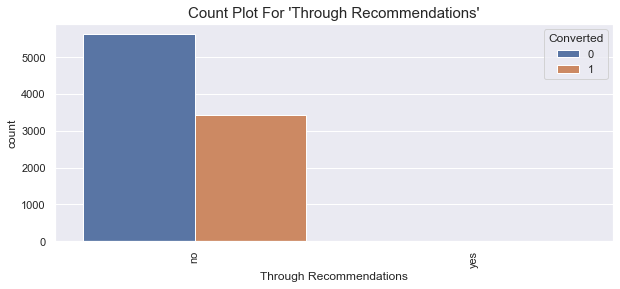

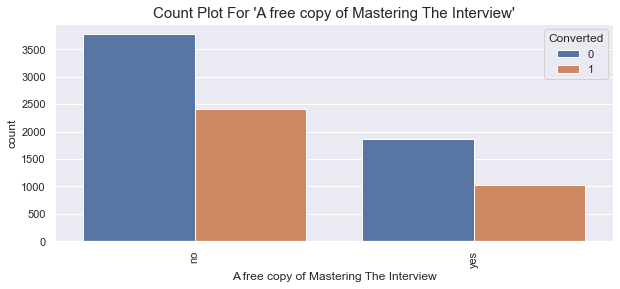

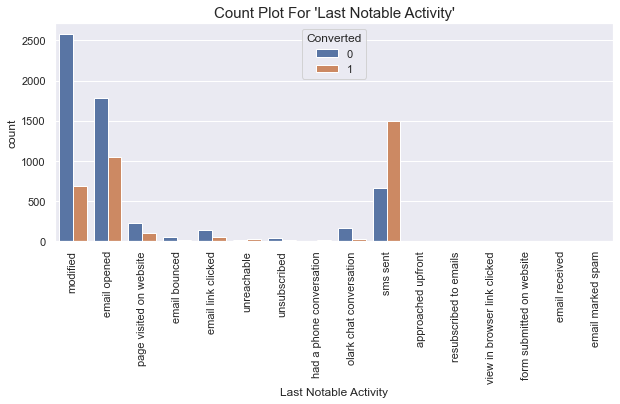

In [895]:
for i,name in enumerate(data.columns):
    if data[name].dtype == 'object':
        bivariate_categorical_countplot(name)

### Bivariate Analysis On Numerical Variable

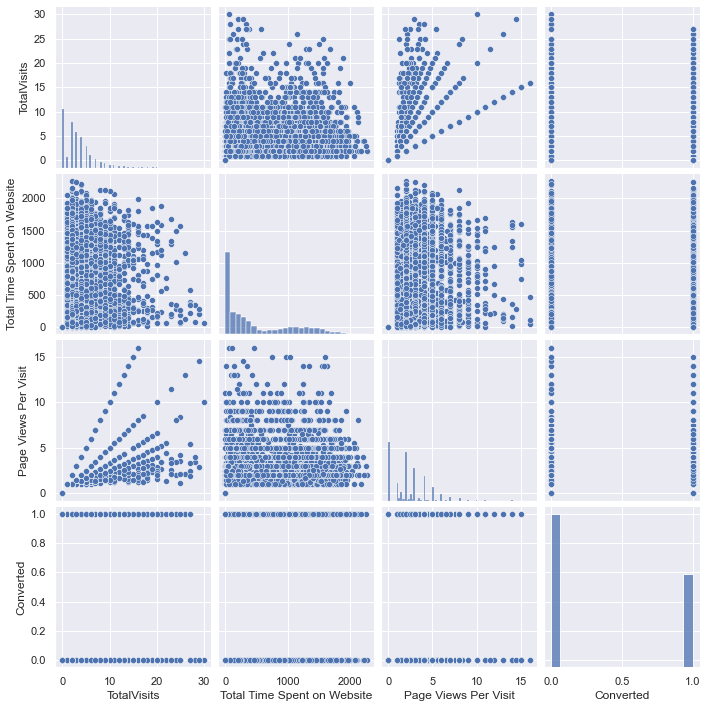

In [896]:
num = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit' , 'Converted']
sns.pairplot(data[num])
plt.show()

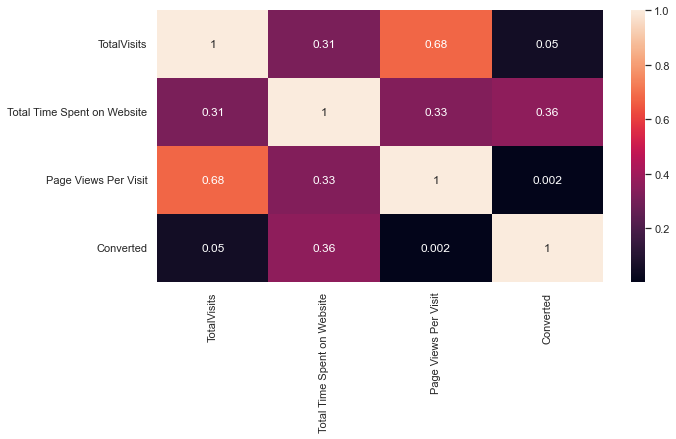

In [897]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(data[num].corr() ,annot=True)
plt.show()

# 3. Dummy Variables 

In [898]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9063 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9063 non-null   object 
 1   Lead Source                                    9063 non-null   object 
 2   Do Not Email                                   9063 non-null   object 
 3   Do Not Call                                    9063 non-null   object 
 4   Converted                                      9063 non-null   int64  
 5   TotalVisits                                    9063 non-null   float64
 6   Total Time Spent on Website                    9063 non-null   int64  
 7   Page Views Per Visit                           9063 non-null   float64
 8   Last Activity                                  9063 non-null   object 
 9   Country                                        9063 

In [899]:
data.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      api      olark chat           no          no   
1                      api  organic search           no          no   
2  landing page submission  direct traffic           no          no   
3  landing page submission  direct traffic           no          no   
4  landing page submission          google           no          no   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity       Country           Specialization  \
0  page visited on website  not provided             not provided   
1             email opened         india             not provided   
2             email opened         india  business administration   
3              unreachable         india    media and advertising   
4        converted to lead         india             not provided   

  What is your current occupation  \
0                      unemployed   
1                      unemployed   
2                         student   
3                      unemployed   
4                      unemployed   

  What matters most to you in choosing a course Search Newspaper Article  \
0                       better career prospects     no                no   
1                       better career prospects     no                no   
2                       better career prospects     no                no   
3                       better career prospects     no                no   
4                       better career prospects     no                no   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 no        no                    no                      no   
1                 no        no                    no                      no   
2                 no        no                    no                      no   
3                 no        no                    no                      no   
4                 no        no                    no                      no   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                                     no              modified  
4                                     no              modified

In [900]:
data['Do Not Email'].value_counts()

no     8353
yes     710
Name: Do Not Email, dtype: int64

We have Notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'. Since practically all of the values for these variables are No, it's best that we drop these columns because then the model will be biased on one side and also it won't help the analysis.

In [901]:
data = data.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'] , axis = 1)

In [902]:
data.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      api      olark chat           no          0   
1                      api  organic search           no          0   
2  landing page submission  direct traffic           no          1   
3  landing page submission  direct traffic           no          0   
4  landing page submission          google           no          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity       Country           Specialization  \
0  page visited on website  not provided             not provided   
1             email opened         india             not provided   
2             email opened         india  business administration   
3              unreachable         india    media and advertising   
4        converted to lead         india             not provided   

  What is your current occupation  \
0                      unemployed   
1                      unemployed   
2                         student   
3                      unemployed   
4                      unemployed   

  What matters most to you in choosing a course  \
0                       better career prospects   
1                       better career prospects   
2                       better career prospects   
3                       better career prospects   
4                       better career prospects   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     no              modified  
1                                     no          email opened  
2                                    yes          email opened  
3                                     no              modified  
4                                     no              modified

In [903]:
data['What matters most to you in choosing a course'].value_counts()

better career prospects      6364
not provided                 2697
flexibility & convenience       1
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [904]:
data['Country'].value_counts()

india            6481
not provided     2296
outside india     286
Name: Country, dtype: int64

Here we can see there are almost 70% values belong to one category for column Country , 'What matters most to you in choosing a course'. Hence we can drop this column also.

In [905]:
data = data.drop(['What matters most to you in choosing a course', 'Country'], axis =1)

In [906]:
data.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      api      olark chat           no          0   
1                      api  organic search           no          0   
2  landing page submission  direct traffic           no          1   
3  landing page submission  direct traffic           no          0   
4  landing page submission          google           no          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  page visited on website             not provided   
1             email opened             not provided   
2             email opened  business administration   
3              unreachable    media and advertising   
4        converted to lead             not provided   

  What is your current occupation A free copy of Mastering The Interview  \
0                      unemployed                                     no   
1                      unemployed                                     no   
2                         student                                    yes   
3                      unemployed                                     no   
4                      unemployed                                     no   

  Last Notable Activity  
0              modified  
1          email opened  
2          email opened  
3              modified  
4              modified

In [907]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(data[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
data_final_dum = pd.concat([data, dummy], axis=1)
data_final_dum.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      api      olark chat           no          0   
1                      api  organic search           no          0   
2  landing page submission  direct traffic           no          1   
3  landing page submission  direct traffic           no          0   
4  landing page submission          google           no          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  page visited on website             not provided   
1             email opened             not provided   
2             email opened  business administration   
3              unreachable    media and advertising   
4        converted to lead             not provided   

  What is your current occupation A free copy of Mastering The Interview  \
0                      unemployed                                     no   
1                      unemployed                                     no   
2                         student                                    yes   
3                      unemployed                                     no   
4                      unemployed                                     no   

  Last Notable Activity  Lead Origin_landing page submission  \
0              modified                                    0   
1          email opened                                    0   
2          email opened                                    1   
3              modified                                    1   
4              modified                                    1   

   Lead Origin_lead add form  Lead Origin_lead import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Specialization_business administration  Specialization_e-business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   Specialization_e-commerce  Specialization_finance management  \
0                          0                                  0   
1                          0                                  0   
2                          0                                  0   
3                          0                                  0   
4                          0                                  0   

   Specialization_healthcare management  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Specialization_hospitality management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_human resource management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Specialization_in

In [908]:
# after creating the dummy variable remove the original column
data_final_dum = data_final_dum.drop(['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1)

In [909]:
data_final_dum.shape

(9063, 83)

In [910]:
data_final_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9063 entries, 0 to 9239
Data columns (total 83 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9063 non-null   int64  
 1   TotalVisits                                           9063 non-null   float64
 2   Total Time Spent on Website                           9063 non-null   int64  
 3   Page Views Per Visit                                  9063 non-null   float64
 4   Lead Origin_landing page submission                   9063 non-null   uint8  
 5   Lead Origin_lead add form                             9063 non-null   uint8  
 6   Lead Origin_lead import                               9063 non-null   uint8  
 7   Specialization_business administration                9063 non-null   uint8  
 8   Specialization_e-business                             9063

# 4. Train Test Split

In [911]:
# Import the required library
from sklearn.model_selection import train_test_split

In [912]:
X = data_final_dum.drop(['Converted'], axis = 1)
y = data_final_dum['Converted']

In [913]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

#### Standarizing the numerical variable

In [914]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7971     0.133333                     0.110915               0.25000   
4207     0.000000                     0.000000               0.00000   
8470     0.066667                     0.057658               0.12500   
838      0.066667                     0.199824               0.12500   
708      0.100000                     0.093750               0.09375   

      Lead Origin_landing page submission  Lead Origin_lead add form  \
7971                                    1                          0   
4207                                    0                          0   
8470                                    1                          0   
838                                     0                          0   
708                                     0                          0   

      Lead Origin_lead import  Specialization_business administration  \
7971                        0                                       0   
4207                        0                                       0   
8470                        0                                       0   
838                         0                                       0   
708                         0                                       0   

      Specialization_e-business  Specialization_e-commerce  \
7971                          0                          0   
4207                          0                          0   
8470                          0                          0   
838                           0                          0   
708                           0                          0   

      Specialization_finance management  Specialization_healthcare management  \
7971                                  1                                     0   
4207                                  0                                     0   
8470                                  0                                     0   
838                                   0                                     0   
708                                   1                                     0   

      Specialization_hospitality management  \
7971                                      0   
4207                                      0   
8470                                      0   
838                                       0   
708                                       0   

      Specialization_human resource management  \
7971                                         0   
4207                                         0   
8470                                         0   
838                                          0   
708                                          0   

      Specialization_international business  \
7971                                      0   
4207                                      0   
8470                                      0   
838                                       0   
708                                       0   

      Specialization_it projects management  \
7971                                      0   
4207                                      0   
8470                                      0   
838                                       0   
708                                       0   

      Specialization_marketing management  \
7971                                    0   
4207                                    0   
8470                                    0   
838                                     0   
708                                     0   

      Specialization_media and advertising  Specialization_not provided  \
7971                                     0                            0   
4207                                     0                            1   
8470                                     0                            0   
838                                      0                            1   
708                                      0   

#### checking the corelation between varaibles

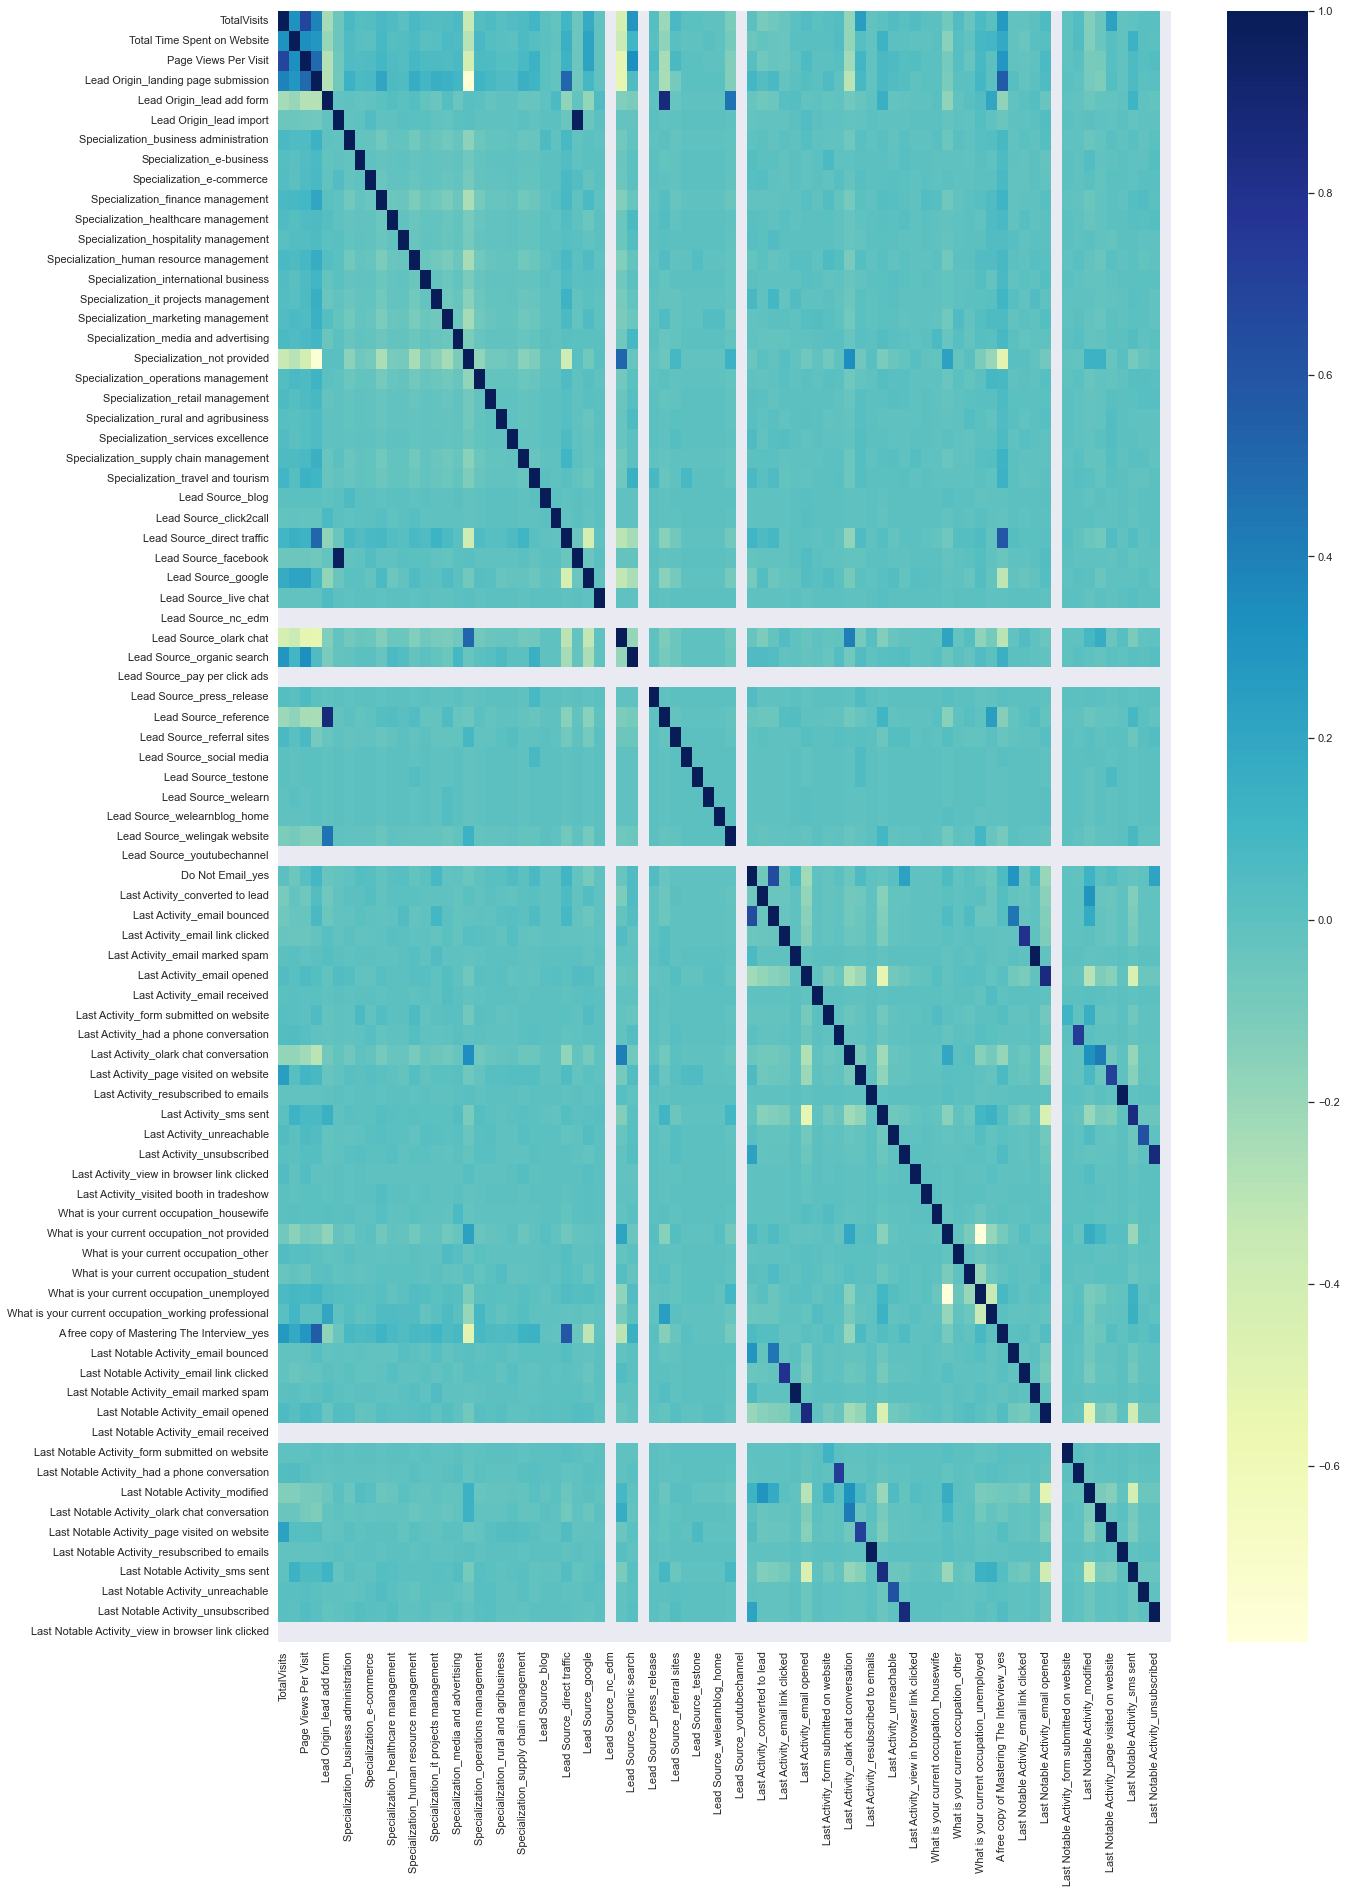

In [915]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr() ,cmap="YlGnBu")
plt.show()

- Since there are lots of variables. It been very difficult to analyze the variables. So we will use the RFE technique

# 5. Model Building

In [916]:
# Import
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [917]:
logreg = LogisticRegression()
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)


In [918]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 8),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 42),
 ('Specialization_business administration', False, 49),
 ('Specialization_e-business', False, 54),
 ('Specialization_e-commerce', False, 20),
 ('Specialization_finance management', False, 63),
 ('Specialization_healthcare management', False, 26),
 ('Specialization_hospitality management', False, 13),
 ('Specialization_human resource management', False, 57),
 ('Specialization_international business', False, 32),
 ('Specialization_it projects management', False, 61),
 ('Specialization_marketing management', False, 36),
 ('Specialization_media and advertising', False, 56),
 ('Specialization_not provided', False, 9),
 ('Specialization_operations management', False, 53),
 ('Specialization_retail management', False, 48),
 ('Specialization_rural and agribu

In [919]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

##### Creating the First Model

In [920]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [921]:
X_train_sm = sm.add_constant(X_train)
logReg1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logReg1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.5
Date:                Tue, 12 Jul 2022   Deviance:                       5305.1
Time:                        10:01:49   Pearson chi2:                 6.37e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0438      0.096    -10.903      0.000      -1.231      -0.856
TotalVisits                                              1.6331      0.356      4.590      0.000       0.936       2.330
Total Time Spent on Website                              4.5453      0.166     27.362      0.000       4.220       4.871
Lead Origin_lead add form                                4.1835      0.232     18.049      0.000       3.729       4.638
Lead Source_olark chat                                   1.3966      0.114     12.298      0.000       1.174       1.619
Lead Source_welingak website                             2.4978      1.037      2.409      0.016       0.465       4.530
Do Not Email_yes                                        -1.4672      0.204     -7.185      0.000      -1.867      -1.067
Last Activity_email bounced                             -1.5349      0.439     -3.499      0.000      -2.395      -0.675
Last Activity_olark chat conversation                   -1.3710      0.199     -6.887      0.000      -1.761      -0.981
What is your current occupation_housewife               23.2679   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
What is your current occupation_working professional     2.9283      0.200     14.673      0.000       2.537       3.319
Last Notable Activity_email link clicked                -2.0443      0.279     -7.317      0.000      -2.592      -1.497
Last Notable Activity_email opened                      -1.3683      0.087    -15.669      0.000      -1.539      -1.197
Last Notable Activity_modified                          -1.7401      0.097    -18.027      0.000      -1.929      -1.551
Last Notable Activity_olark chat conversation           -1.6291      0.379     -4.293      0.000      -2.373      -0.885
Last Notable Activity_page visited on website           -2.0540      0.219     -9.396      0.000      -2.482      -1.626
========================================================================================================================
"""

In [922]:
# calculation the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                         TotalVisits  2.33
12                     Last Notable Activity_modified  1.94
7               Last Activity_olark chat conversation  1.92
5                                    Do Not Email_yes  1.89
6                         Last Activity_email bounced  1.86
1                         Total Time Spent on Website  1.85
11                 Last Notable Activity_email opened  1.65
3                              Lead Source_olark chat  1.63
2                           Lead Origin_lead add form  1.49
13      Last Notable Activity_olark chat conversation  1.37
4                        Lead Source_welingak website  1.31
9   What is your current occupation_working profes...  1.18
14      Last Notable Activity_page visited on website  1.18
10           Last Notable Activity_email link clicked  1.04
8           What is your current occupation_housewife  1.00

- Removing the What is your current occupation_housewife column as it have high p value

In [923]:
# removing the column
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

##### creating the Second Model

In [924]:
X_train_sm = sm.add_constant(X_train)
logReg2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logReg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.6
Date:                Tue, 12 Jul 2022   Deviance:                       5317.1
Time:                        10:01:49   Pearson chi2:                 6.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0405      0.096    -10.877      0.000      -1.228      -0.853
TotalVisits                                              1.6208      0.356      4.558      0.000       0.924       2.318
Total Time Spent on Website                              4.5432      0.166     27.386      0.000       4.218       4.868
Lead Origin_lead add form                                4.1831      0.232     18.065      0.000       3.729       4.637
Lead Source_olark chat                                   1.3901      0.113     12.254      0.000       1.168       1.612
Lead Source_welingak website                             2.4910      1.037      2.402      0.016       0.459       4.523
Do Not Email_yes                                        -1.4689      0.204     -7.195      0.000      -1.869      -1.069
Last Activity_email bounced                             -1.5369      0.438     -3.505      0.000      -2.396      -0.677
Last Activity_olark chat conversation                   -1.3768      0.199     -6.919      0.000      -1.767      -0.987
What is your current occupation_working professional     2.9235      0.200     14.651      0.000       2.532       3.315
Last Notable Activity_email link clicked                -2.0434      0.279     -7.314      0.000      -2.591      -1.496
Last Notable Activity_email opened                      -1.3634      0.087    -15.625      0.000      -1.534      -1.192
Last Notable Activity_modified                          -1.7321      0.096    -17.972      0.000      -1.921      -1.543
Last Notable Activity_olark chat conversation           -1.6203      0.379     -4.271      0.000      -2.364      -0.877
Last Notable Activity_page visited on website           -2.0520      0.219     -9.390      0.000      -2.480      -1.624
========================================================================================================================
"""

In [925]:
# calculation the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                         TotalVisits  2.33
11                     Last Notable Activity_modified  1.94
7               Last Activity_olark chat conversation  1.92
5                                    Do Not Email_yes  1.89
6                         Last Activity_email bounced  1.86
1                         Total Time Spent on Website  1.85
10                 Last Notable Activity_email opened  1.65
3                              Lead Source_olark chat  1.63
2                           Lead Origin_lead add form  1.49
12      Last Notable Activity_olark chat conversation  1.37
4                        Lead Source_welingak website  1.31
8   What is your current occupation_working profes...  1.18
13      Last Notable Activity_page visited on website  1.18
9            Last Notable Activity_email link clicked  1.04

In [926]:
# removing the column Lead Source_welingak website as it has high p value
X_train.drop('Lead Source_welingak website', axis = 1, inplace = True)

##### creating the third model

In [927]:
X_train_sm = sm.add_constant(X_train)
logReg3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logReg3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2664.5
Date:                Tue, 12 Jul 2022   Deviance:                       5329.0
Time:                        10:01:49   Pearson chi2:                 6.54e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0378      0.096    -10.857      0.000      -1.225      -0.850
TotalVisits                                              1.6199      0.356      4.556      0.000       0.923       2.317
Total Time Spent on Website                              4.5424      0.166     27.390      0.000       4.217       4.867
Lead Origin_lead add form                                4.5138      0.224     20.147      0.000       4.075       4.953
Lead Source_olark chat                                   1.3889      0.113     12.246      0.000       1.167       1.611
Do Not Email_yes                                        -1.4557      0.202     -7.193      0.000      -1.852      -1.059
Last Activity_email bounced                             -1.4990      0.427     -3.509      0.000      -2.336      -0.662
Last Activity_olark chat conversation                   -1.3755      0.199     -6.908      0.000      -1.766      -0.985
What is your current occupation_working professional     2.9126      0.200     14.585      0.000       2.521       3.304
Last Notable Activity_email link clicked                -2.0504      0.280     -7.331      0.000      -2.599      -1.502
Last Notable Activity_email opened                      -1.3668      0.087    -15.677      0.000      -1.538      -1.196
Last Notable Activity_modified                          -1.7374      0.096    -18.051      0.000      -1.926      -1.549
Last Notable Activity_olark chat conversation           -1.5945      0.375     -4.247      0.000      -2.330      -0.859
Last Notable Activity_page visited on website           -2.0538      0.218     -9.405      0.000      -2.482      -1.626
========================================================================================================================
"""

In [928]:
# calculation the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                         TotalVisits  2.33
10                     Last Notable Activity_modified  1.94
6               Last Activity_olark chat conversation  1.92
4                                    Do Not Email_yes  1.89
5                         Last Activity_email bounced  1.86
1                         Total Time Spent on Website  1.85
9                  Last Notable Activity_email opened  1.65
3                              Lead Source_olark chat  1.62
11      Last Notable Activity_olark chat conversation  1.37
12      Last Notable Activity_page visited on website  1.18
7   What is your current occupation_working profes...  1.16
2                           Lead Origin_lead add form  1.15
8            Last Notable Activity_email link clicked  1.04

#### The model seems good as it has low P value and VIF is also less than 3. So logreg3 is our final model

# 6. Making Prediction

In [929]:
# Predicting on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7971    0.145074
4207    0.012856
8470    0.106816
838     0.760065
708     0.100892
2268    0.365105
4872    0.098441
1561    0.993450
2899    0.372870
7486    0.839346
dtype: float64

In [930]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14507355, 0.01285563, 0.10681643, 0.76006534, 0.10089217,
       0.3651055 , 0.09844088, 0.99345017, 0.37287022, 0.8393458 ])

In [931]:
#creating the  Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final_df = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final_df.head()

Converted  Conversion_Probability
0          0                0.145074
1          0                0.012856
2          0                0.106816
3          1                0.760065
4          0                0.100892

In [932]:
# with the cut off as 0.5, Substituting 0 or 1 values
y_train_pred_final_df['Predicted'] = y_train_pred_final_df.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final_df.head()

Converted  Conversion_Probability  Predicted
0          0                0.145074          0
1          0                0.012856          0
2          0                0.106816          0
3          1                0.760065          1
4          0                0.100892          0

# 7. Model Evaluation

In [933]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final_df.Converted, y_train_pred_final_df.Predicted )
confusion

array([[3475,  448],
       [ 755, 1666]], dtype=int64)

In [934]:
# Predicted     not_churn    churn
# Actual
# not_churn        3475       448
# churn             755      1666

In [935]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final_df.Converted, y_train_pred_final_df.Predicted)

0.8103720050441362

In [936]:
# true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [937]:
# Calculating the sensitivity
TP/(TP+FN)

0.688145394465097

In [938]:
# Calculating the specificity
TN/(TN+FP)

0.8858016823859292

- ___With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 69% and specificity of around 88%.___

# 8. ROC Curve

#### FInding the Optimal Cutoff

In [939]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [940]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final_df.Converted, y_train_pred_final_df.Conversion_Probability, drop_intermediate = False )

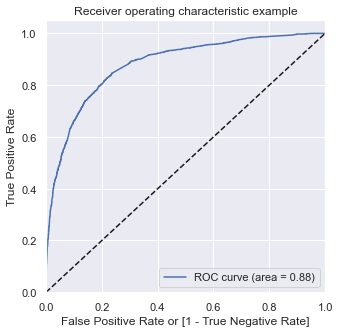

In [941]:
# Call the ROC function
draw_roc(y_train_pred_final_df.Converted, y_train_pred_final_df.Conversion_Probability)

##### Area under ROC curve is 0.88

In [942]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_df[i]= y_train_pred_final_df.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final_df.head()

Converted  Conversion_Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0                0.145074          0    1    1    0    0    0    0   
1          0                0.012856          0    1    0    0    0    0    0   
2          0                0.106816          0    1    1    0    0    0    0   
3          1                0.760065          1    1    1    1    1    1    1   
4          0                0.100892          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    0    0  
4    0    0    0    0

In [943]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_df.Converted, y_train_pred_final_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.381620  1.000000  0.000000
0.1   0.1  0.580391  0.966956  0.341830
0.2   0.2  0.751103  0.902520  0.657660
0.3   0.3  0.797762  0.831475  0.776956
0.4   0.4  0.808323  0.763321  0.836095
0.5   0.5  0.810372  0.688145  0.885802
0.6   0.6  0.794451  0.577447  0.928371
0.7   0.7  0.779161  0.502272  0.950038
0.8   0.8  0.760404  0.419248  0.970941
0.9   0.9  0.706021  0.245353  0.990314

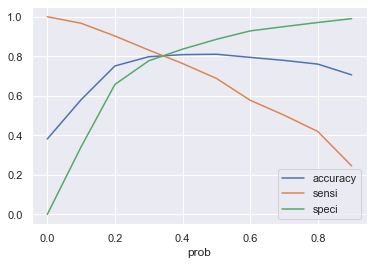

In [944]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the graph where the three curve met is the optimal cutoff. In above graph it is approximatley cutoff at 0.35

In [945]:
y_train_pred_final_df['Final_predicted'] = y_train_pred_final_df.Conversion_Probability.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final_df.head()

Converted  Conversion_Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0                0.145074          0    1    1    0    0    0    0   
1          0                0.012856          0    1    0    0    0    0    0   
2          0                0.106816          0    1    1    0    0    0    0   
3          1                0.760065          1    1    1    1    1    1    1   
4          0                0.100892          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  Final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    1    1    0    0                1  
4    0    0    0    0                0

##### checking the matrix again by taking cutoff 0.35

In [946]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final_df.Converted, y_train_pred_final_df.Final_predicted)

0.8035939470365699

In [947]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final_df.Converted, y_train_pred_final_df.Final_predicted )
confusion2

array([[3165,  758],
       [ 488, 1933]], dtype=int64)

In [948]:
# true positive
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0]

In [949]:
# Calculating the sensitivity
TP/(TP+FN)

0.7984304006608839

In [950]:
# Calculating the specificity
TN/(TN+FP)

0.8067805251083354

- ___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of approximatley around 80%.___

# 9. Prediction on Test set

#### Scaling numerical variables

In [951]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [952]:
# Substituting all the columns in the final train model
col = X_train.columns

In [953]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Do Not Email_yes', 'Last Activity_email bounced',
       'Last Activity_olark chat conversation',
       'What is your current occupation_working professional',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened', 'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')

In [954]:
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
9127    1.0     0.300000                     0.153169   
3515    1.0     0.166667                     0.502641   
1195    1.0     0.066667                     0.121919   
6873    1.0     0.000000                     0.000000   
2645    1.0     0.300000                     0.506162   
1979    1.0     0.200000                     0.715669   
2390    1.0     0.000000                     0.000000   
8818    1.0     0.100000                     0.580986   
637     1.0     0.100000                     0.430458   
3747    1.0     0.166667                     0.027289   
1705    1.0     0.100000                     0.246039   
7789    1.0     0.200000                     0.721391   
5086    1.0     0.000000                     0.000000   
7817    1.0     0.066667                     0.336708   
1481    1.0     0.033333                     0.366197   
1588    1.0     0.066667                     0.789613   
5231    1.0     0.000000                     0.000000   
5351    1.0     0.166667                     0.338028   
2250    1.0     0.100000                     0.044454   
7144    1.0     0.100000                     0.015845   
7599    1.0     0.000000                     0.000000   
6110    1.0     0.300000                     0.091549   
5089    1.0     0.466667                     0.528169   
1976    1.0     0.200000                     0.629842   
408     1.0     0.066667                     0.110035   
1475    1.0     0.100000                     0.532570   
1356    1.0     0.266667                     0.242077   
8002    1.0     0.266667                     0.152289   
4809    1.0     0.133333                     0.429577   
6153    1.0     0.133333                     0.290493   
150     1.0     0.166667                     0.270246   
8636    1.0     0.233333                     0.138644   
8570    1.0     0.133333                     0.102993   
7449    1.0     0.033333                     0.174296   
7390    1.0     0.000000                     0.000000   
4142    1.0     0.233333                     0.050616   
1419    1.0     0.233333                     0.412852   
3802    1.0     0.066667                     0.110035   
104     1.0     0.166667                     0.526408   
9110    1.0     0.000000                     0.000000   
1133    1.0     0.000000                     0.000000   
7334    1.0     0.066667                     0.434419   
760     1.0     0.100000                     0.510563   
3063    1.0     0.266667                     0.463908   
8689    1.0     0.000000                     0.000000   
6868    1.0     0.033333                     0.098592   
6815    1.0     0.000000                     0.000000   
6165    1.0     0.233333                     0.099472   
7464    1.0     0.000000                     0.000000   
2795    1.0     0.133333                     0.113116   
1205    1.0     0.566667                     0.300176   
5575    1.0     0.000000                     0.000000   
4823    1.0     0.066667                     0.055018   
6934    1.0     0.066667                     0.007042   
6566    1.0     0.033333                     0.147447   
5612    1.0     0.300000                     0.060299   
2381    1.0     0.000000                     0.000000   
8729    1.0     0.233333                     0.100792   
5558    1.0     0.233333                     0.001320   
935     1.0     0.100000                     0.400968   
5597    1.0     0.066667                     0.472711   
2392    1.0     0.100000                     0.680018   
3073    1.0     0.166667                     0.436620   
3414    1.0     0.333333                     0.797535   
3655    1.0     0.233333                     0.560739   
1036    1.0     0.133333                     0.040493   
765     1.0     0.033333                     0.041373   
2543    1.0     0.000000                     0.000000   
3110    1.0     0.000000                     0.000000   
8582    1.0     

In [955]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.168897
1          1         0.819848
2          1         0.407082
3          0         0.199998
4          1         0.593994

In [956]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.168897                0
1             1         0.819848                1
2             1         0.407082                1
3             0         0.199998                0
4             1         0.593994                1
5             1         0.926693                1
6             1         0.969997                1
7             1         0.230253                0
8             1         0.675019                1
9             0         0.118085                0
10            0         0.245076                0
11            1         0.928439                1
12            0         0.059421                0
13            1         0.895235                1
14            1         0.973768                1
15            1         0.934432                1
16            1         0.586871                1
17            0         0.354525                1
18            0         0.082317                0
19            0         0.591782                1
20            0         0.059421                0
21            0         0.182006                0
22            1         0.679277                1
23            0         0.685747                1
24            0         0.102719                0
25            1         0.956438                1
26            0         0.294618                0
27            1         0.202643                0
28            1         0.755736                1
29            0         0.295436                0
30            1         0.612944                1
31            0         0.184548                0
32            1         0.928145                1
33            1         0.727720                1
34            0         0.199998                0
35            0         0.142248                0
36            1         0.372410                1
37            0         0.102719                0
38            1         0.471513                1
39            0         0.199998                0
40            0         0.082820                0
41            1         0.930164                1
42            1         0.427016                1
43            1         0.441278                1
44            0         0.265856                0
45            0         0.093354                0
46            1         0.265856                0
47            0         0.448181                1
48            0         0.199998                0
49            0         0.157781                0
50            0         0.469243                1
51            0         0.891793                1
52            0         0.105677                0
53            0         0.003721                0
54            0         0.113908                0
55            0         0.430953                1
56            0         0.014520                0
57            1         0.125717                0
58            0         0.342120                0
59            1         0.396205                1
60            1         0.372859                1
61            1         0.901414                1
62            1         0.462230                1
63            0         0.852961                1
64            1         0.627246                1
65            0         0.118709                0
66            0         0.073559                0
67            1         0.891793                1
68            0         0.265856                0
69            1         0.210550                0
70            0         0.199998                0
71            1         0.891793                1
72            0         0.367727                1
73            1         0.956762                1
74            1         0.891793                1
75            1         0.941375                1
76            1         0.398437                1
77            1         0.850513                1
78            0         0.969997                1
79    

In [957]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.804707613093049

In [958]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1367,  340],
       [ 191,  821]], dtype=int64)

In [959]:
# true positive
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0]

In [960]:
# Calculating the sensitivity
TP/(TP+FN)

0.8112648221343873

In [961]:
# Calculating the specificity
TN/(TN+FP)

0.8008201523140012

- ___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___

# 10. Calculating Precision-Recall

In [962]:
confusion = metrics.confusion_matrix(y_train_pred_final_df.Converted, y_train_pred_final_df.Predicted )
confusion

array([[3475,  448],
       [ 755, 1666]], dtype=int64)

In [963]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7880794701986755

In [964]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.688145394465097

- ___With the current cut off as 0.35 we have Precision around 79% and Recall around 69%___

### Precision and recall tradeoff

In [965]:
y_train_pred_final_df.Converted, y_train_pred_final_df.Predicted

(0       0
 1       0
 2       0
 3       1
 4       0
 5       1
 6       1
 7       1
 8       0
 9       1
 10      1
 11      0
 12      0
 13      1
 14      0
 15      1
 16      0
 17      0
 18      1
 19      1
 20      1
 21      1
 22      1
 23      0
 24      1
 25      1
 26      1
 27      1
 28      0
 29      0
 30      0
 31      0
 32      0
 33      1
 34      0
 35      0
 36      0
 37      0
 38      0
 39      1
 40      0
 41      0
 42      1
 43      1
 44      0
 45      1
 46      0
 47      0
 48      0
 49      0
 50      1
 51      1
 52      0
 53      0
 54      1
 55      1
 56      0
 57      1
 58      0
 59      1
 60      0
 61      0
 62      0
 63      1
 64      0
 65      0
 66      1
 67      0
 68      0
 69      0
 70      0
 71      0
 72      0
 73      1
 74      0
 75      0
 76      0
 77      0
 78      0
 79      0
 80      1
 81      0
 82      0
 83      0
 84      0
 85      0
 86      1
 87      0
 88      0
 89      0
 90      0

In [966]:
p, r, thresholds = precision_recall_curve(y_train_pred_final_df.Converted, y_train_pred_final_df.Conversion_Probability)

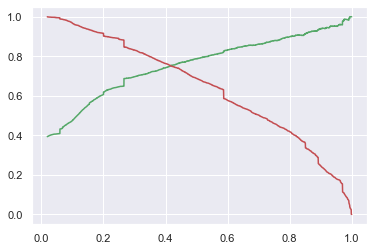

In [967]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [968]:
y_train_pred_final_df['Final_predicted'] = y_train_pred_final_df.Conversion_Probability.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final_df.head()

Converted  Conversion_Probability  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0                0.145074          0    1    1    0    0    0    0   
1          0                0.012856          0    1    0    0    0    0    0   
2          0                0.106816          0    1    1    0    0    0    0   
3          1                0.760065          1    1    1    1    1    1    1   
4          0                0.100892          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  Final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    1    1    0    0                1  
4    0    0    0    0                0

In [969]:
# Accuracy
metrics.accuracy_score(y_train_pred_final_df.Converted, y_train_pred_final_df.Final_predicted)

0.8100567465321563

In [970]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final_df.Converted, y_train_pred_final_df.Final_predicted )
confusion2

array([[3305,  618],
       [ 587, 1834]], dtype=int64)

In [971]:
# true positive
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0]

In [972]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7479608482871125

In [973]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7575382073523338

- __With the current cut off as 0.41 we have Precision And Recall around 75%__

# 11. Prediction on Test set with cutoff 0.41

In [974]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.168897
1          1         0.819848
2          1         0.407082
3          0         0.199998
4          1         0.593994

In [975]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

Converted  Conversion_Prob  final_predicted
0             0         0.168897                0
1             1         0.819848                1
2             1         0.407082                0
3             0         0.199998                0
4             1         0.593994                1
5             1         0.926693                1
6             1         0.969997                1
7             1         0.230253                0
8             1         0.675019                1
9             0         0.118085                0
10            0         0.245076                0
11            1         0.928439                1
12            0         0.059421                0
13            1         0.895235                1
14            1         0.973768                1
15            1         0.934432                1
16            1         0.586871                1
17            0         0.354525                0
18            0         0.082317                0
19            0         0.591782                1
20            0         0.059421                0
21            0         0.182006                0
22            1         0.679277                1
23            0         0.685747                1
24            0         0.102719                0
25            1         0.956438                1
26            0         0.294618                0
27            1         0.202643                0
28            1         0.755736                1
29            0         0.295436                0
30            1         0.612944                1
31            0         0.184548                0
32            1         0.928145                1
33            1         0.727720                1
34            0         0.199998                0
35            0         0.142248                0
36            1         0.372410                0
37            0         0.102719                0
38            1         0.471513                1
39            0         0.199998                0
40            0         0.082820                0
41            1         0.930164                1
42            1         0.427016                1
43            1         0.441278                1
44            0         0.265856                0
45            0         0.093354                0
46            1         0.265856                0
47            0         0.448181                1
48            0         0.199998                0
49            0         0.157781                0
50            0         0.469243                1
51            0         0.891793                1
52            0         0.105677                0
53            0         0.003721                0
54            0         0.113908                0
55            0         0.430953                1
56            0         0.014520                0
57            1         0.125717                0
58            0         0.342120                0
59            1         0.396205                0
60            1         0.372859                0
61            1         0.901414                1
62            1         0.462230                1
63            0         0.852961                1
64            1         0.627246                1
65            0         0.118709                0
66            0         0.073559                0
67            1         0.891793                1
68            0         0.265856                0
69            1         0.210550                0
70            0         0.199998                0
71            1         0.891793                1
72            0         0.367727                0
73            1         0.956762                1
74            1         0.891793                1
75            1         0.941375                1
76            1         0.398437                0
77            1         0.850513                1
78            0         0.969997                1
79    

In [976]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8120632585509379

In [977]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1421,  286],
       [ 225,  787]], dtype=int64)

In [978]:
# true positive
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0]

In [979]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7334575955265611

In [980]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7776679841897233

- ___With the current cut off as 0.41 we have Precision around 73% and Recall around 77%___

# 12. Conclusion


By analysing we have found that the variables that mattered the most in the potential buyers are:
1.	The total time spend on the Website.
2.  When the lead origin is Lead add format
3.  When their current occupation is as a working professional
4.	Total number of visits.
5.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	olark chat<br>
d.	Welingak website<br>
6.	When the last activity was:<br>
a.	EMail Bounced<br>
b.	Olark chat conversation<br>
7.	When the last notable activity was:<br>
a.Email linked clicked<br>
b.Email Opened<br>
c.Olark chat conversation<br>
d.Activity modified<br>
e.Page visited on website

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.